In [2]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
#from google.colab import files

# Comparing Two Samples

In [3]:
#upload the file baby.csv
#upload if you on google collab

In [9]:
#Read the file baby.csv
baby_data = pd.read_csv('C:/University/University Files/University-Code/Year 1/Semester 1/Python/Lessons/Data/csv/baby.csv')

In [12]:
baby_data

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [20]:
#create a new table only with Maternal Smoker and Birth Weight
smoking_and_birthweight = baby_data[['Maternal Smoker', 'Birth Weight']]
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [21]:
#Determine the number of non smokers and smokers
smoking_and_birthweight.groupby('Maternal Smoker').size()
#size() counts

Maternal Smoker
False    715
True     459
dtype: int64

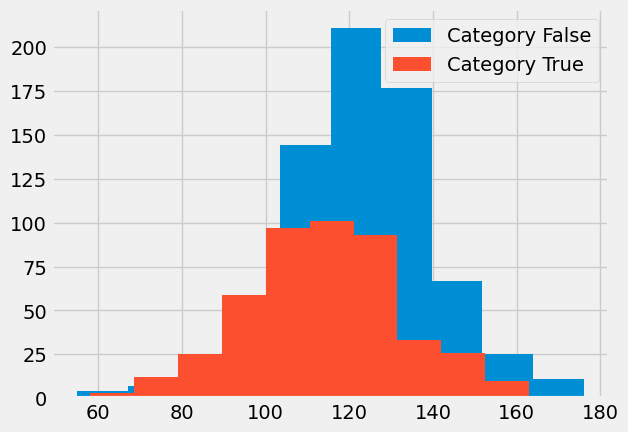

In [22]:
#plot the grouped data into a histogram
grouped = smoking_and_birthweight.groupby('Maternal Smoker')
#category, creates tables, sees for true and false
for category, group in grouped:
    plots.hist(group['Birth Weight'],label = f'Category {category}')

plots.legend()


In [23]:
# we will need to standardize the data, we want to determine the average for the birth weight on smokers and non-smoking moms.

# Test Statistic

[Question] What values of our statistic are in favor of the alternative: positive or negative?

In [25]:
#Determine the mean of the birth weight for smokers vs non-smokers
mean_table = smoking_and_birthweight.groupby('Maternal Smoker').mean()
mean_table

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [26]:
#What is the difference between the birth weight for smokers and non-smokers
observed_difference = mean_table.iloc[1,:]-mean_table.iloc[0,:1]
observed_difference.to_numpy()[0]

np.float64(-9.266142572024918)

In [27]:
#Create a function to input a table, a label and group label. which would then determine the label difference grouped by the values in group label
def difference_of_means(table, label, group_label):
     """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
     
     reduced = table[[label, group_label]]

     mean_table = reduced.groupby(group_label).mean()
     means_difference = mean_table.iloc[1,:]-mean_table.iloc[0,:]

     return means_difference.to_numpy()[0]


In [28]:
#Let's test this function
difference_of_means(baby_data, 'Birth Weight', 'Maternal Smoker')


np.float64(-9.266142572024918)

# Random Permutation (Shuffling)

In [48]:
#Let's create a table
letters = pd.DataFrame({'Letter': ['A', 'B', 'C', 'D']})


In [33]:
letters

,letter
0,A
1,B
2,C
3,D


In [40]:
#Let's shuffle with replacement
letters.sample(4)

,letter
0,A
3,D
1,B
2,C


In [41]:
#Let's shuffle without replacement
letters.sample(4, replace=True)

,letter
2,C
2,C
1,B
2,C


In [49]:
#Let's put the shuffle without replacement as a column into the table, letters.
shuffled_letters = letters.sample(4)
letters['Shuffled'] = shuffled_letters['Letter'].values
letters

,Letter,Shuffled
0,A,B
1,B,A
2,C,C
3,D,D


# Simulation Under Null Hypothesis

In [50]:
#Call table smoking_and_birthweight
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [51]:
#Create an array with maternal smoker column being shuffled
shuffled_labels = np.random.permutation(smoking_and_birthweight['Maternal Smoker'])
shuffled_labels

array([False, False, False, ..., False, False, False])

In [53]:
#Create a new table original_and_shuffled and add the shuffled labels as a column
original_and_shuffled = smoking_and_birthweight
original_and_shuffled['Shuffled Label'] = shuffled_labels
original_and_shuffled

C:\Users\Haju8\AppData\Local\Temp\ipykernel_15696\3898270721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_and_shuffled['Shuffled Label'] = shuffled_labels


,Maternal Smoker,Birth Weight,Shuffled Label
0,False,120,False
1,False,113,False
2,True,128,False
3,True,108,True
4,False,136,True
...,...,...,...
1169,False,113,False
1170,False,128,False
1171,True,130,False
1172,False,125,False


In [56]:
#determine the difference mean in birth weight for shuffled label
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

np.float64(-0.7022045492633708)

In [57]:
#determine the difference mean in birth weight for Maternal smoker
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

np.float64(-9.266142572024918)

# Permutation Test

In [58]:
#Let's put this all into a function
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""

    # array of shuffled labels
    shuffled_labels = np.random.permutation(table[group_label])

    # table of numerical variable and shuffled labels
    table['Shuffled Label'] = shuffled_labels

    return difference_of_means(table, label, 'Shuffled Label')

In [60]:
#Test this function
one_simulated_difference(baby_data, 'Birth Weight', 'Maternal Smoker')

np.float64(-2.4443256090314947)

In [61]:
#Let's run this multiple times
diffrerence = []

for _ in np.arange(2500):
    new_difference = one_simulated_difference(baby_data, 'Birth Weight', 'Maternal Smoker')
    diffrerence.append(new_difference)

Observed Difference:  Birth Weight   -9.266143
dtype: float64


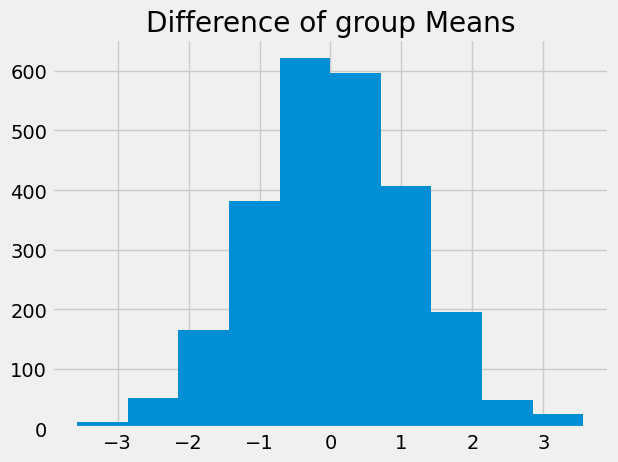

In [63]:
#Let's plot the distribution from the results above
table = pd.DataFrame({'Difference of group Means' : diffrerence})
table.hist('Difference of group Means')

print('Observed Difference: ',observed_difference)

### Question would you release these results?

Why yes or why no?